In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#find local CAMB installation:
camb_path = os.path.join(os.path.abspath('.'),'CAMB')
sys.path.insert(0,camb_path)
import camb
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Using CAMB 1.5.4 installed at /home/edo/Software/TESI/AstroCosmoComputational/Students/Martinelli_Edoardo/Lesson_CAMB_6_05/CAMB/camb


In [2]:
#Set up a new set of parameters for CAMB
#The defaults give one massive neutrino and helium set using BBN consistency
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, 
                       omk=0, tau=0.06, As=2e-9, ns=0.965)
pars2 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06,
                        omk=0, tau=0.02, As=2e-9, ns=0.965)

In [3]:
#calculate results for these parameters
results = camb.get_results(pars)
results2 = camb.get_results(pars2)

## Background cosmology: ##

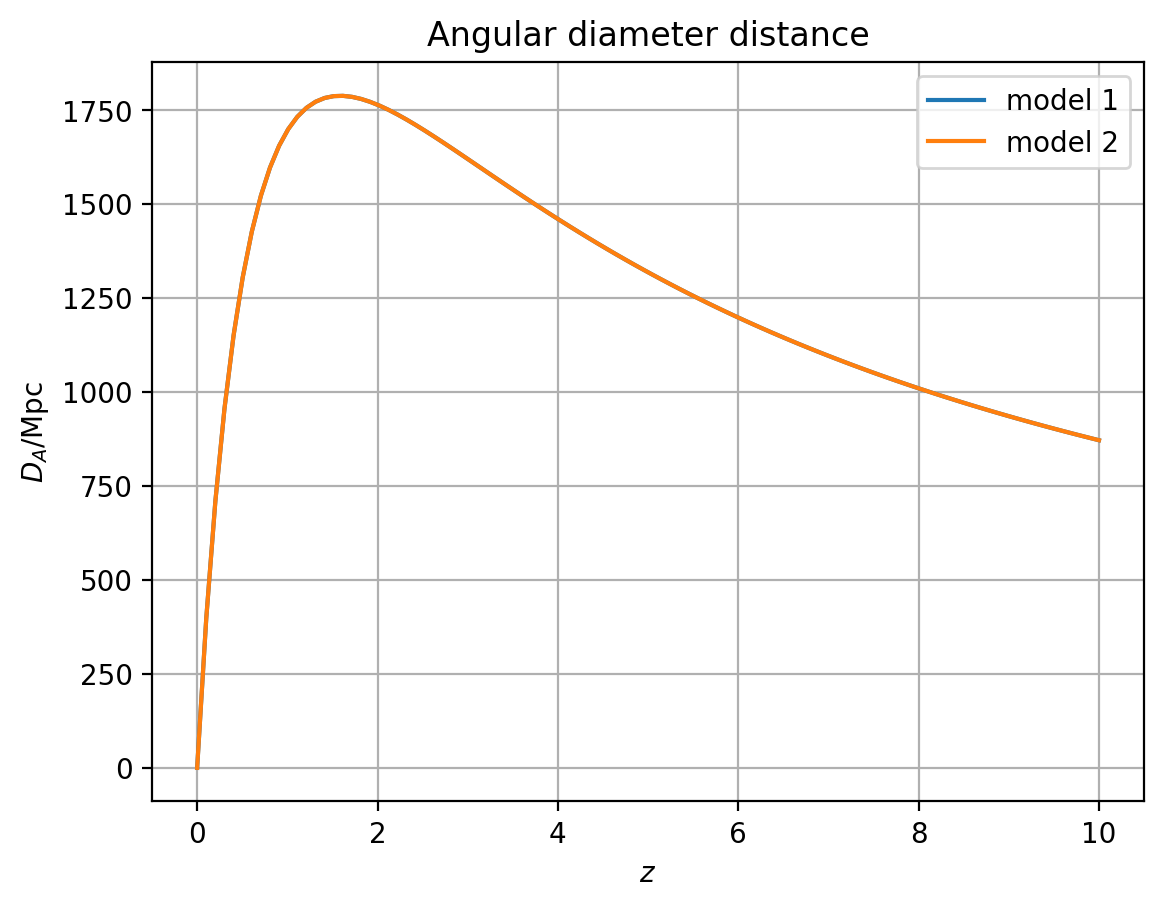

In [4]:
# distancies

z = np.linspace(0,10,100)
DA = results.angular_diameter_distance(z)
DA2 = results2.angular_diameter_distance(z)
plt.plot(z, DA, label='model 1')
plt.plot(z, DA2, label='model 2')
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Angular diameter distance')
plt.legend()

plt.grid();

In [5]:
# densities
a=np.logspace(-6,0,1000)
densities=results.get_background_densities(a)
densities2=results2.get_background_densities(a)

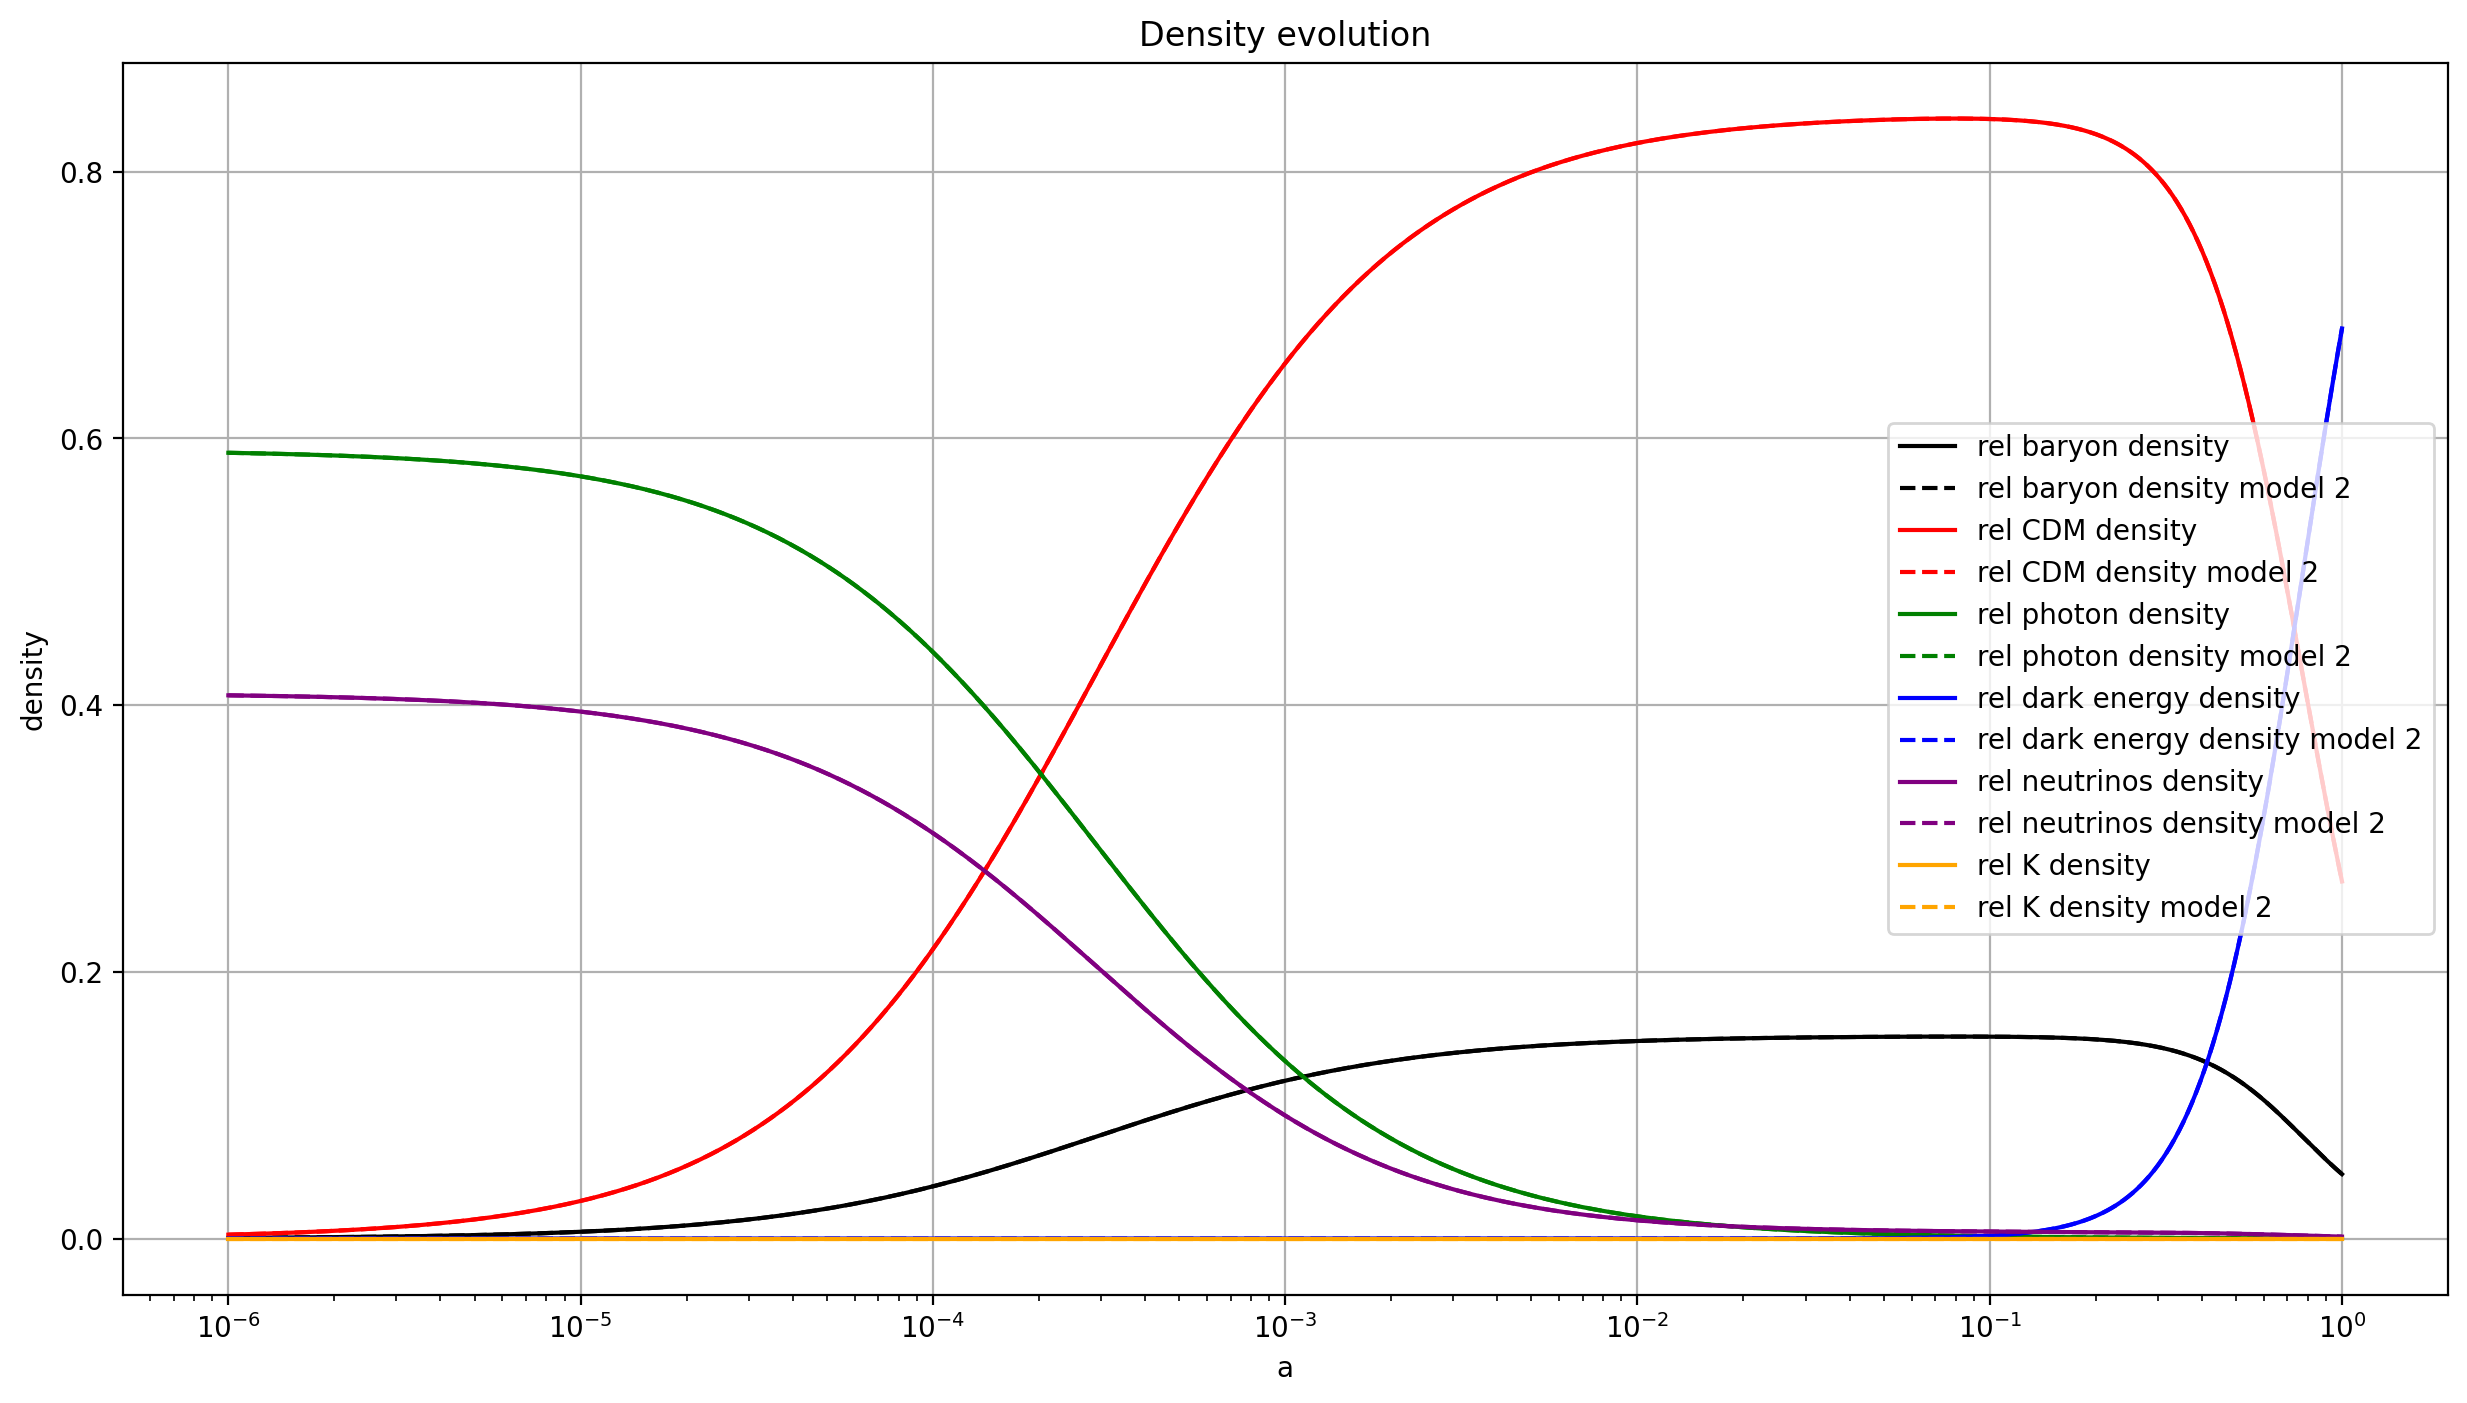

In [6]:
fig=plt.figure(figsize=(15, 8))

plt.plot(a, densities['baryon']/densities['tot'], label='rel baryon density', color='black')
plt.plot(a, densities2['baryon']/densities2['tot'], label='rel baryon density model 2', linestyle='--', color='black')

plt.plot(a, densities['cdm']/densities['tot'], label='rel CDM density', color='red')
plt.plot(a, densities2['cdm']/densities2['tot'], label='rel CDM density model 2', linestyle='--', color='red')

plt.plot(a, densities['photon']/densities['tot'], label='rel photon density', color='green')
plt.plot(a, densities2['photon']/densities2['tot'], label='rel photon density model 2', linestyle='--', color='green')

plt.plot(a, densities['de']/densities['tot'], label='rel dark energy density', color='blue')
plt.plot(a, densities2['de']/densities2['tot'], label='rel dark energy density model 2', linestyle='--', color='blue')

plt.plot(a, (densities['neutrino']+densities['nu'])/densities['tot'], label='rel neutrinos density', color='purple')
plt.plot(a, (densities2['neutrino']+densities2['nu'])/densities2['tot'], label='rel neutrinos density model 2', linestyle='--', color='purple')

plt.plot(a, densities['K']/densities['tot'], label='rel K density', color='orange')
plt.plot(a, densities2['K']/densities2['tot'], label='rel K density model 2', linestyle='--', color='orange')

plt.xscale('log')

plt.xlabel('a')
plt.ylabel('density')
plt.title('Density evolution')
plt.grid()
plt.legend()




## Thermodynamics: ##

In [7]:
z=1./a-1
background = results.get_background_redshift_evolution(z)
background2 = results2.get_background_redshift_evolution(z)


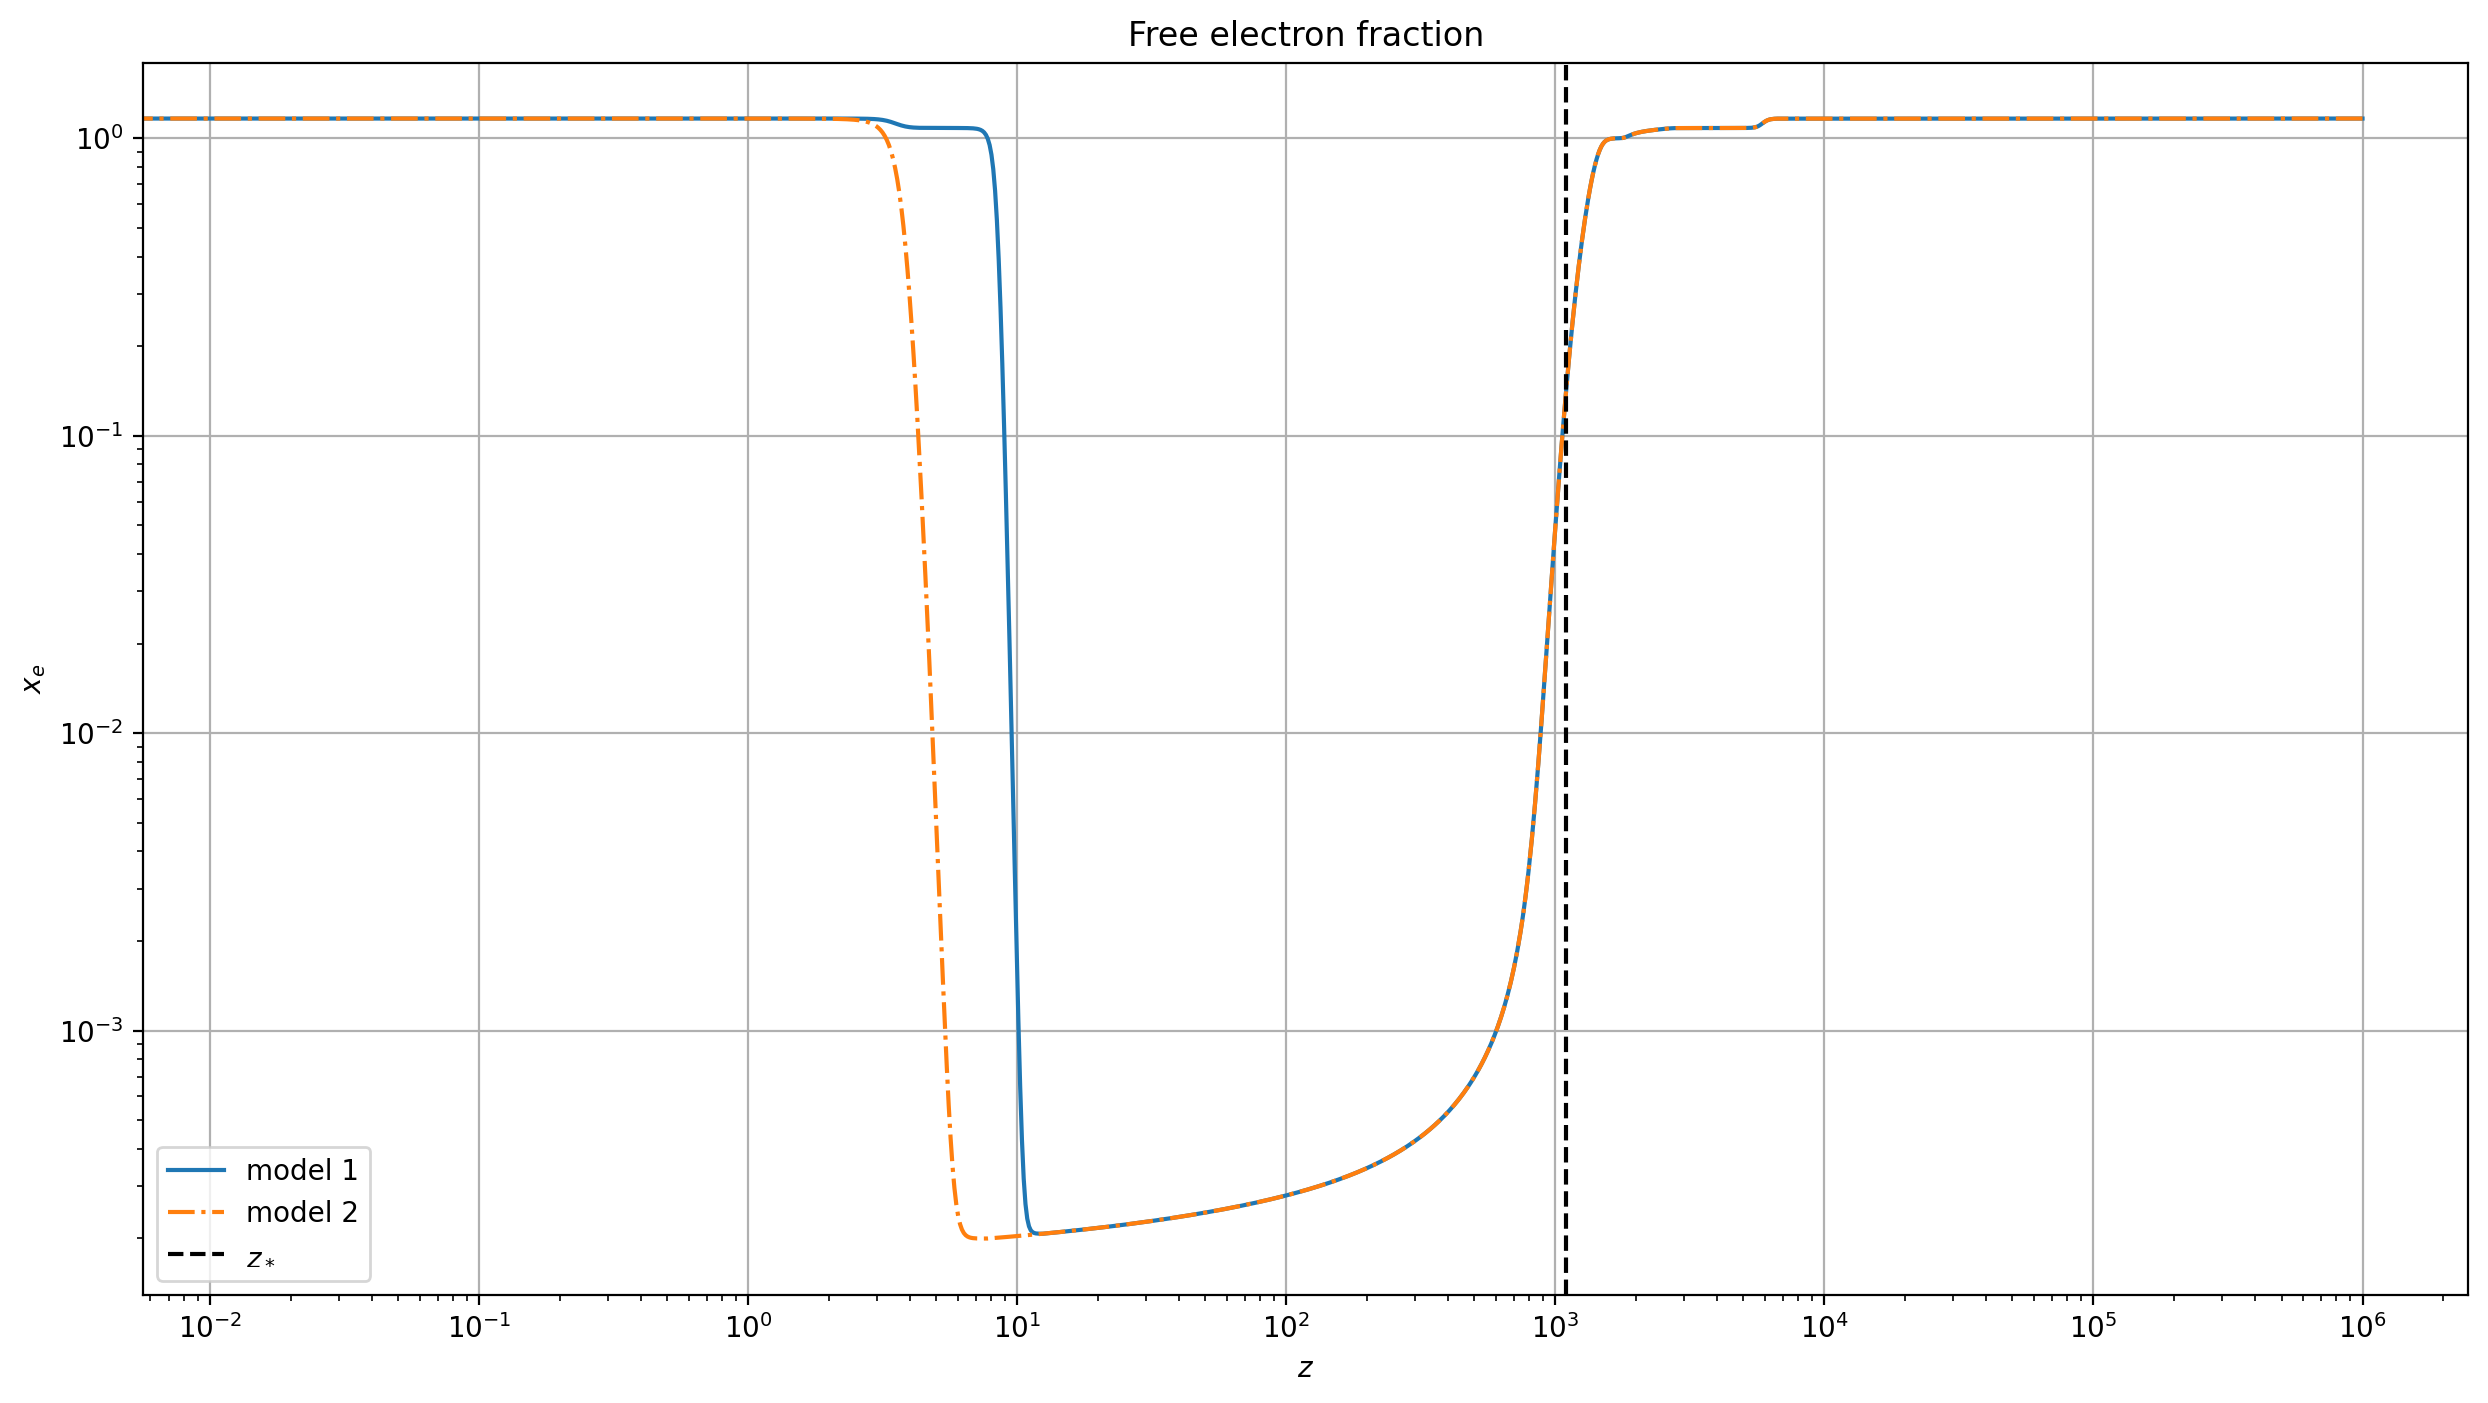

In [8]:
# plt x_e evolution
zstar= results.get_derived_params()['zstar']

plt.figure(figsize=(15, 8))
plt.plot(z, background['x_e'], label='model 1')
plt.plot(z, background2['x_e'], label='model 2',linestyle='-.')
plt.axvline(zstar, color='k', ls='--', label='$z_*$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$z$')
plt.ylabel('$x_e$')
plt.title('Free electron fraction')
plt.grid()
plt.legend()

## Perturbations: ##

In [9]:
_vars=['k/h','delta_cdm','delta_baryon','delta_photon','Weyl','a','H']
_k=0.1
evs=results.get_redshift_evolution(_k,z,vars=_vars)

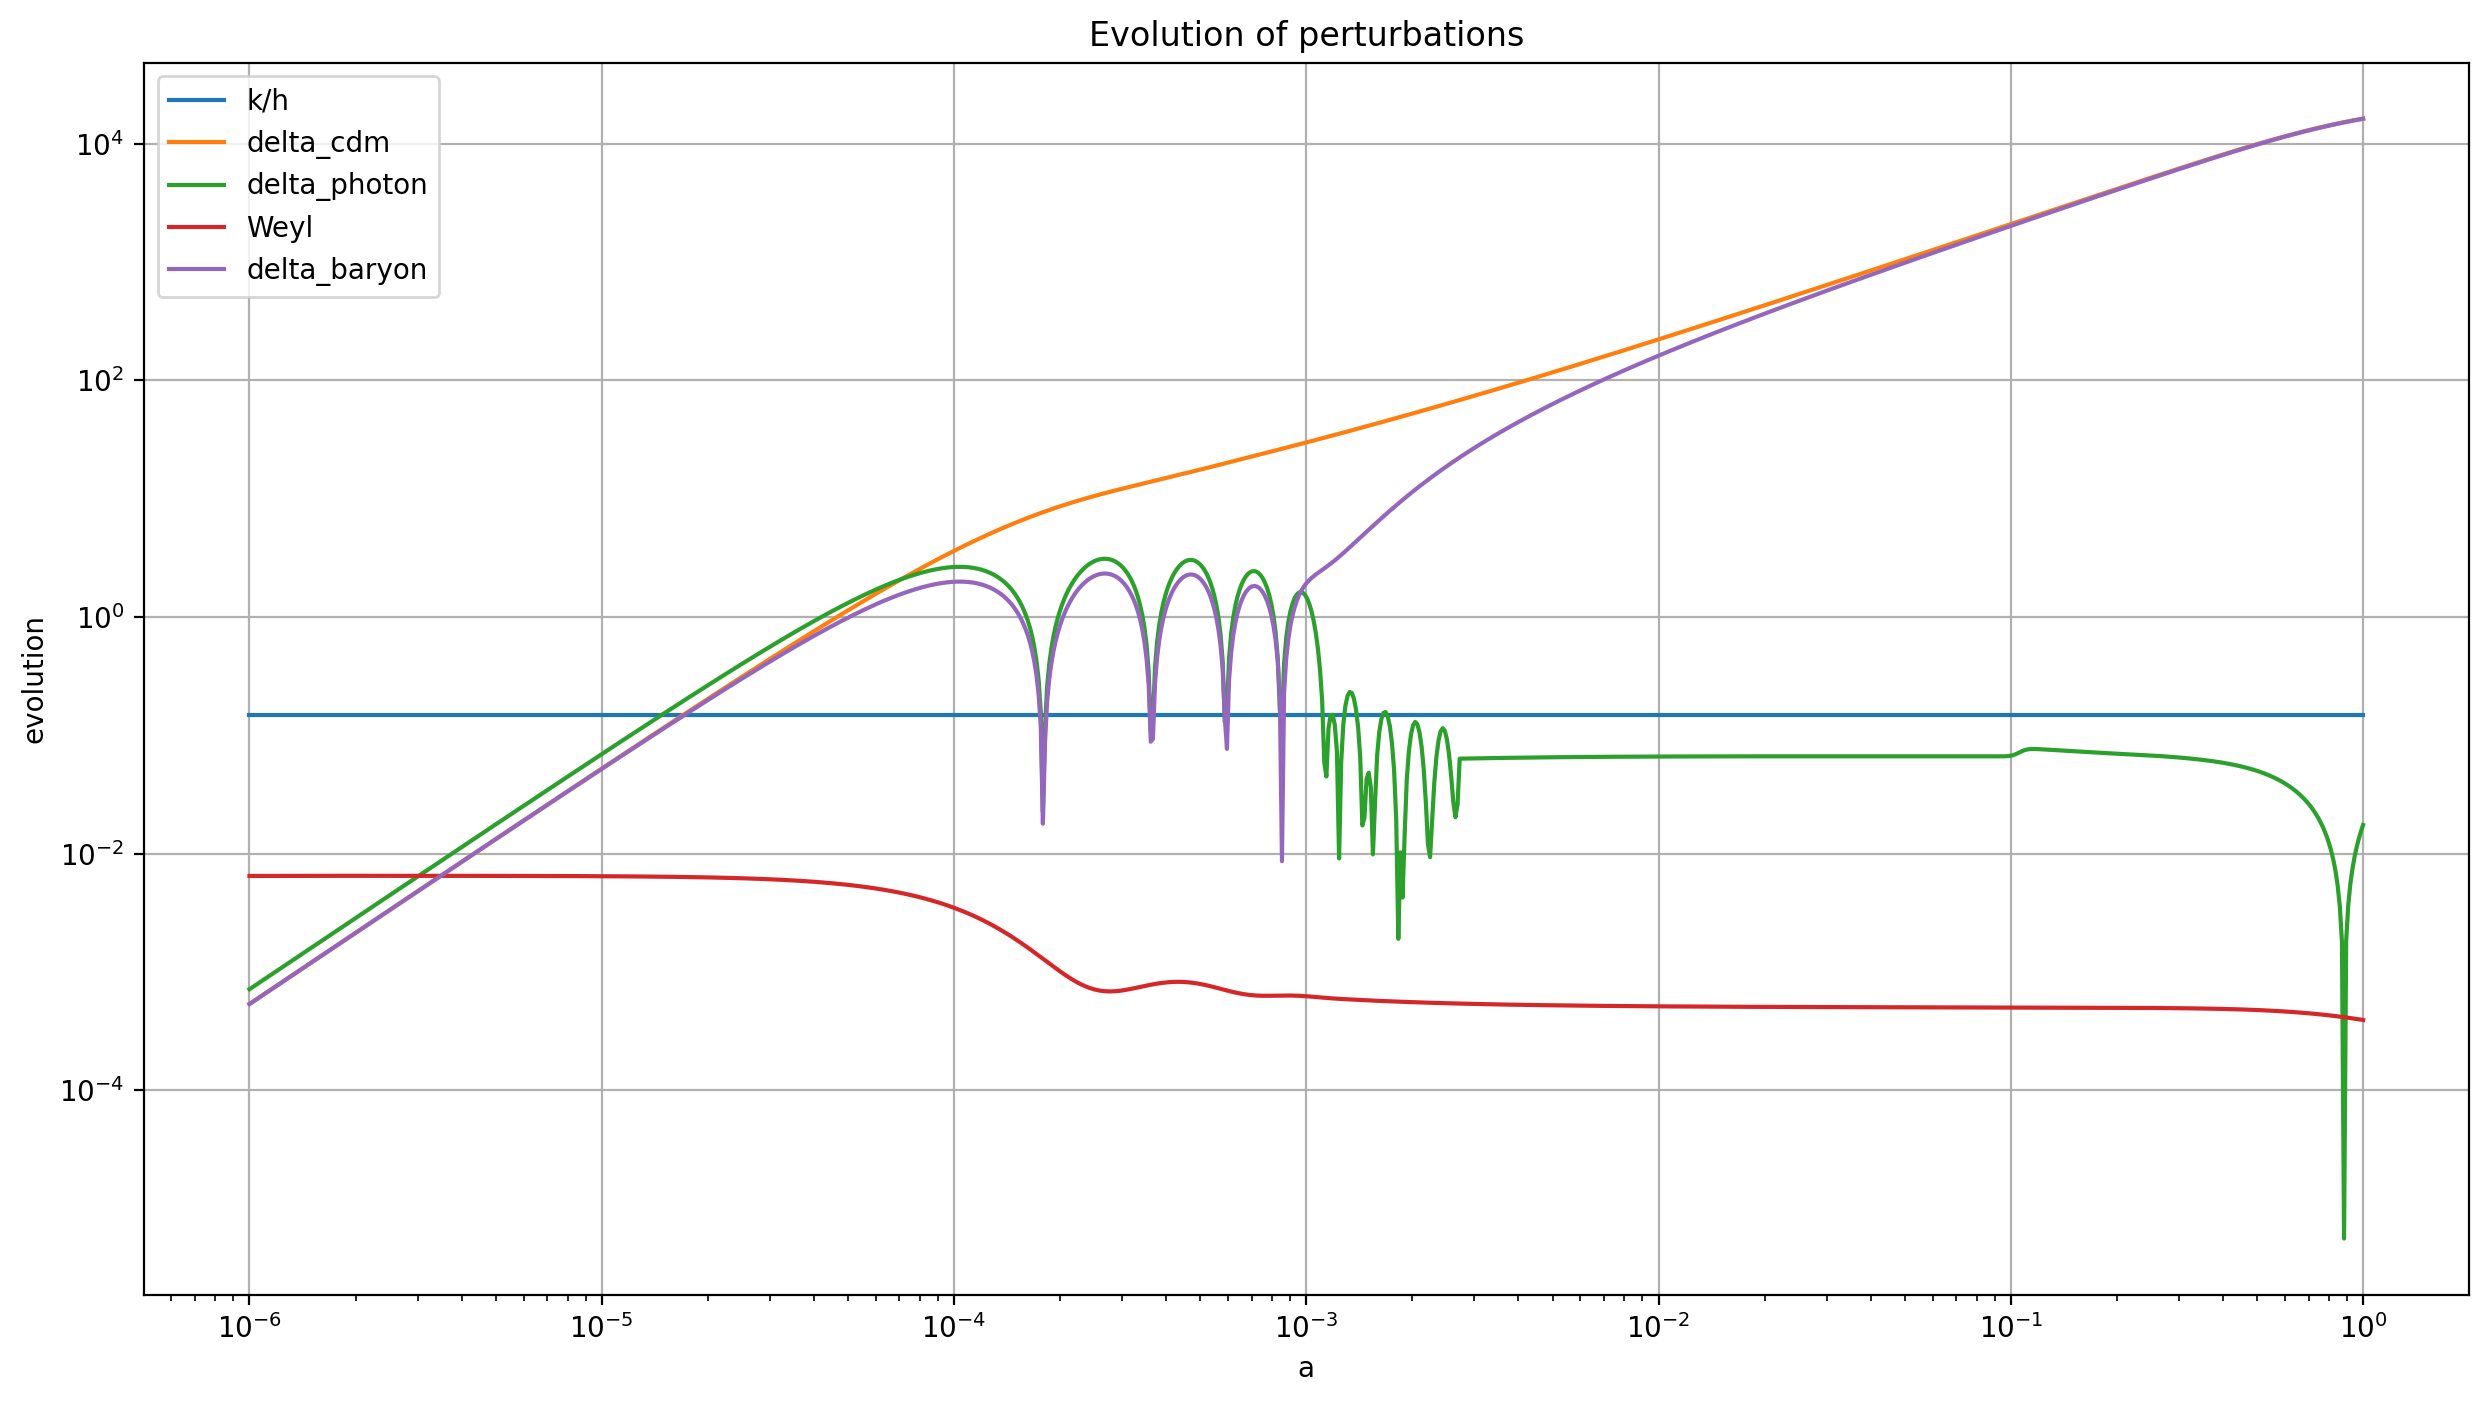

In [10]:
plt.figure(figsize=(15, 8))

plt.plot(a, np.abs(evs[:,_vars.index('k/h')]), label='k/h')
plt.plot(a, np.abs(evs[:,_vars.index('delta_cdm')]), label='delta_cdm')
plt.plot(a, np.abs(evs[:,_vars.index('delta_photon')]), label='delta_photon')
plt.plot(a, np.abs(evs[:,_vars.index('Weyl')]), label='Weyl')
plt.plot(a, np.abs(evs[:,_vars.index('delta_baryon')]), label='delta_baryon')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('a')
plt.ylabel('evolution')
plt.title('Evolution of perturbations')
plt.grid()
plt.legend()

## Power Spectra: ##